<a href="https://colab.research.google.com/github/rofiat13/projects/blob/main/Crystal_Structure_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csc=pd.read_csv('https://s3.us-west-1.wasabisys.com/dphi/datasets/206/train_dataset.csv?AWSAccessKeyId=ABSZWDH67WW3G8YX40WD&Signature=yOmWsNSC2tV27YyhZFX5GCteJAE%3D&Expires=1654464284')

In [3]:
csc.head()

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,0,0,0.52,0.52,0.93,2.18,2.54,2.214685,2.313698,-1.728214,0.582680,0.000000,0.664286,cubic
1,0,0,1.03,0.86,0.60,1.27,1.90,2.500930,0.000000,-1.768643,0.859135,0.000000,0.428571,cubic
2,2,4,0.92,0.67,0.53,1.83,1.88,2.290644,1.930311,-1.468464,0.849994,4.936558,0.378571,cubic
3,1,5,1.64,1.38,0.62,0.82,2.36,3.025719,1.745600,-1.974429,1.064161,3.977376,0.442857,orthorhombic
4,0,0,0.57,0.57,0.71,2.20,1.30,2.300109,2.027412,-1.622357,0.660190,0.000000,0.507143,cubic


In [4]:
csc.shape

(4165, 14)

In [5]:
csc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   v(A)               4165 non-null   int64  
 1   v(B)               4165 non-null   int64  
 2   r(AXII)(Å)         4165 non-null   float64
 3   r(AVI)(Å)          4165 non-null   float64
 4   r(BVI)(Å)          4165 non-null   float64
 5   EN(A)              4165 non-null   float64
 6   EN(B)              4165 non-null   float64
 7   l(A-O)(Å)          4165 non-null   float64
 8   l(B-O)(Å)          4165 non-null   float64
 9   ΔENR               4165 non-null   float64
 10  tG                 4165 non-null   float64
 11  τ                  4165 non-null   float64
 12  μ                  4165 non-null   float64
 13  Lowest distortion  4165 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 455.7+ KB


In [6]:
csc.describe()

,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
count,4165.000000,4165.000000,4165.00000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000,4165.000000
mean,0.882353,1.385114,1.00557,0.841789,0.801999,1.547309,1.599059,2.323011,2.017219,-2.186093,0.781040,1.332182,0.572857
std,1.672111,2.161707,0.33694,0.240549,0.234891,0.447277,0.442961,0.635699,0.555599,0.636470,0.135816,20.804362,0.167778
min,-1.000000,-1.000000,0.27000,0.270000,0.270000,0.790000,0.790000,0.000000,0.000000,-5.411536,0.384648,-480.827696,0.192857
25%,-1.000000,-1.000000,0.73000,0.670000,0.630000,1.200000,1.220000,2.294004,1.956808,-2.570036,0.680809,0.000000,0.450000
50%,0.000000,0.000000,0.98000,0.860000,0.760000,1.500000,1.600000,2.422517,2.075849,-2.084214,0.776944,0.000000,0.542857
75%,2.000000,3.000000,1.24000,0.960000,0.940000,1.910000,1.960000,2.582926,2.284156,-1.734643,0.873123,3.892903,0.671429
max,5.000000,5.000000,1.88000,1.670000,1.670000,2.540000,2.540000,3.300176,3.009747,-0.601714,1.321062,305.871348,1.192857


In [7]:
csc['Lowest distortion'].value_counts()

cubic           2460
orthorhombic    1354
rhombohedral     249
tetragonal       102
Name: Lowest distortion, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


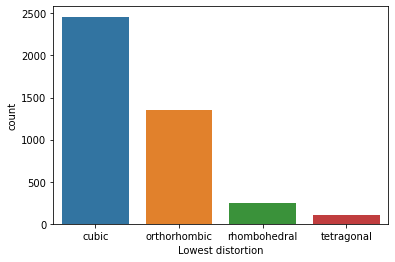

In [8]:
sns.countplot(csc['Lowest distortion'])

In [9]:
y=csc['Lowest distortion']
x=csc.drop('Lowest distortion',axis=1)

In [10]:
y=pd.get_dummies(y)
y

,cubic,orthorhombic,rhombohedral,tetragonal
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0
...,...,...,...,...
4160,0,1,0,0
4161,1,0,0,0
4162,1,0,0,0
4163,1,0,0,0


In [11]:
y=y.drop('cubic', axis=1)

In [12]:
y

,orthorhombic,rhombohedral,tetragonal
0,0,0,0
1,0,0,0
2,0,0,0
3,1,0,0
4,0,0,0
...,...,...,...
4160,1,0,0
4161,0,0,0
4162,0,0,0
4163,0,0,0


In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [17]:
print(y_train.shape)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(2915, 3)
(2915, 13)
(1250, 13)
(1250, 3)


In [18]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [19]:
from sklearn.decomposition import PCA
pca= PCA()
pca.fit(x_train)

PCA()

In [20]:
pca.n_components_

13

In [21]:
pca.transform(x_train)
pca.transform(x_test)

array([[-8.97096480e-01, -2.32778723e+00, -1.12195111e+00, ...,
        -1.50768408e-01,  7.31895988e-02,  8.01985340e-06],
       [ 1.23892334e+00,  1.24065345e+00, -8.19234016e-01, ...,
        -1.21496183e-01, -5.39540805e-02, -3.67281692e-06],
       [ 1.08124954e+00, -1.83989643e+00,  2.02322710e+00, ...,
         6.08048094e-02, -6.53261977e-02, -1.22711008e-06],
       ...,
       [-2.04495506e+00, -8.25901306e-01,  6.29830684e-01, ...,
         1.76457838e-03,  4.88347383e-02, -2.38973948e-05],
       [-2.09645502e+00,  3.61241212e-01,  6.16994542e-01, ...,
         4.33703364e-02, -1.04847755e-02, -1.81934747e-05],
       [ 1.59576143e+00, -8.72729685e-01, -7.93781516e-01, ...,
        -4.69807280e-02,  1.50633700e-02,  1.36772070e-05]])

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier= DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
pred=classifier.predict(x_test)
pred

array([[0, 0, 0],
       [0, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [24]:
classifier.score(x_test, y_test)

0.7256

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

In [26]:
from sklearn.metrics import multilabel_confusion_matrix
cm= multilabel_confusion_matrix(y_test, pred)
print(cm)

[[[ 682  147]
  [ 134  287]]

 [[1110   55]
  [  59   26]]

 [[1202   11]
  [  20   17]]]


In [27]:
from sklearn.metrics import classification_report
clr=classification_report(y_test, pred)
print(clr)

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       421
           1       0.32      0.31      0.31        85
           2       0.61      0.46      0.52        37

   micro avg       0.61      0.61      0.61       543
   macro avg       0.53      0.48      0.50       543
weighted avg       0.60      0.61      0.61       543
 samples avg       0.26      0.26      0.26       543



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
